In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yellowbrick as yb

In [213]:
data = pd.read_csv('C:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python38\\Scripts\\occupancy.csv')
data

datetime  temperature  relative humidity   light      C02  \
0      2015-02-04 17:51:00       23.180            27.2720  426.00   721.25   
1      2015-02-04 17:51:59       23.150            27.2675  429.50   714.00   
2      2015-02-04 17:53:00       23.150            27.2450  426.00   713.50   
3      2015-02-04 17:54:00       23.150            27.2000  426.00   708.25   
4      2015-02-04 17:55:00       23.100            27.2000  426.00   704.50   
...                    ...          ...                ...     ...      ...   
20555  2015-02-18 09:15:00       20.815            27.7175  429.75  1505.25   
20556  2015-02-18 09:16:00       20.865            27.7450  423.50  1514.50   
20557  2015-02-18 09:16:59       20.890            27.7450  423.50  1521.50   
20558  2015-02-18 09:17:59       20.890            28.0225  418.75  1632.00   
20559  2015-02-18 09:19:00       21.000            28.1000  409.00  1864.00   

       humidity  occupancy  
0      0.004793          1  
1      0.004783          1  
2      0.004779          1  
3      0.004772          1  
4      0.004757          1  
...         ...        ...  
20555  0.004213          1  
20556  0.004230          1  
20557  0.004237          1  
20558  0.004279          1  
20559  0.004321          1  

[20560 rows x 7 columns]

In [214]:
features = ['temperature', 'relative humidity', 'light', 'C02', 'humidity']
classes = ['Unoccupied', 'Occupied']

In [215]:
X = data[features]
y = data.occupancy

In [ ]:
# below are mentioned the dependecies of these factors 
# using yellowbrick for visualisation of scikit-learn 
# 1) radial visualisation (through this we can figure out on what factors unoccupied and occupied majorly depends)
# 2) ParallelCoordinates (it represents how on each factor unoccupied and occupied depends)
# 3) Covariance (inter dependencies of each factor)

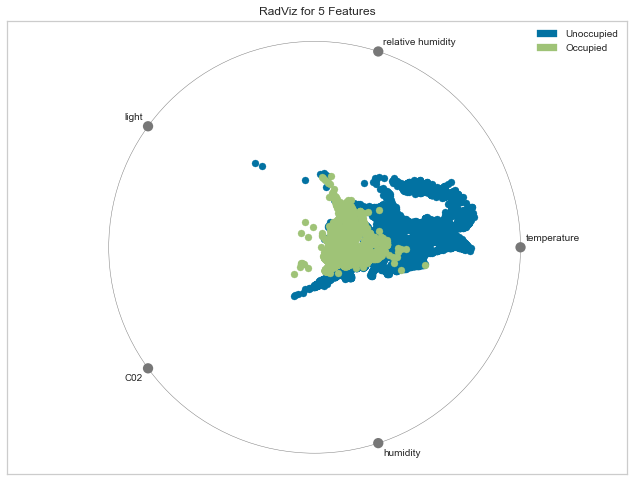

In [216]:
from yellowbrick.features.radviz import RadViz

visualizer = RadViz(classes= classes, features= features, size= (800, 600))
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

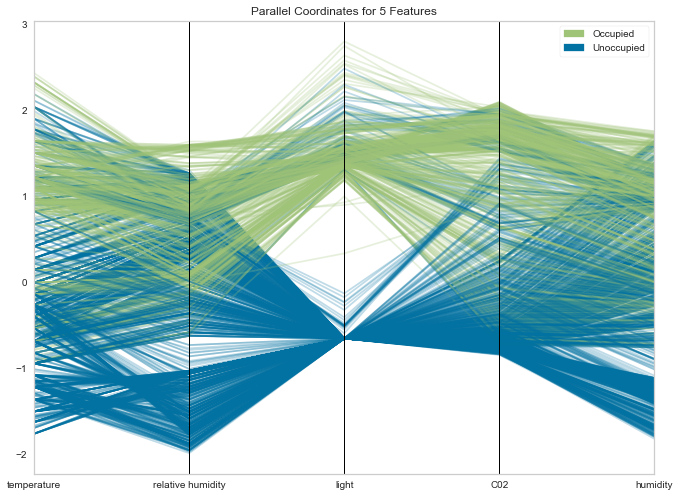

In [217]:
from yellowbrick.features.pcoords import ParallelCoordinates

visualizer = ParallelCoordinates(classes = classes,
                                 features=features,
                                 normalize='standard',
                                 sample = 0.1,
                                 size = (800,600)
                                )
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

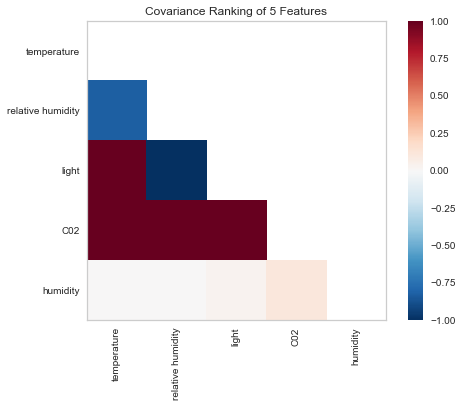

In [218]:
from yellowbrick.features.rankd import Rank2D

visualizer = Rank2D(features=features,
                   algorithm = 'Covariance' #this is already the default
                   )
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
## FITING THE MODEL ##

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

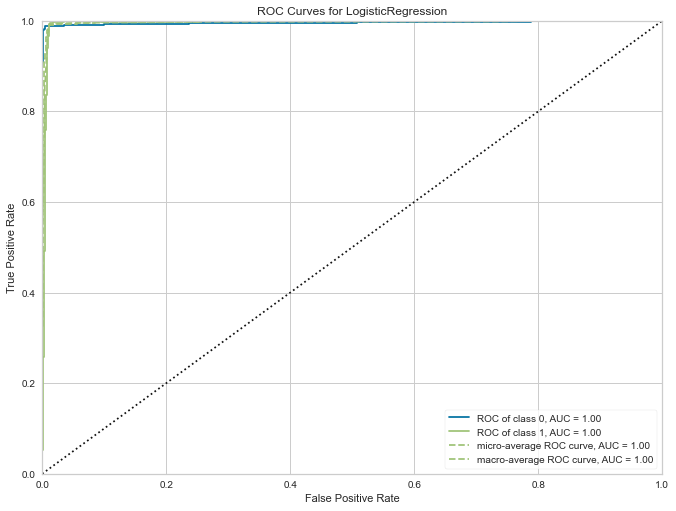

In [220]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression   

visualizer = ROCAUC(LogisticRegression(), size=(800,600))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

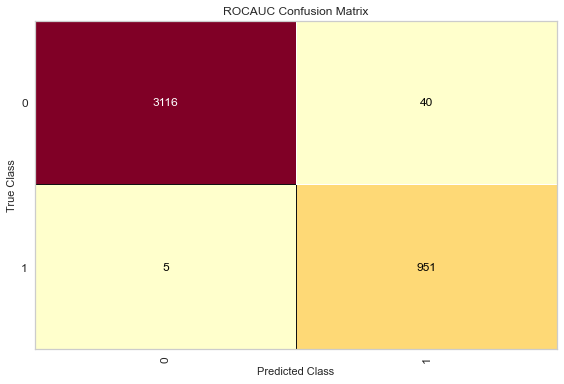

In [221]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(visualizer, classes=[0,1])
cm.score(X_test, y_test)
cm.poof()

In [223]:
from sklearn import metrics
print("Classification Accuracy: %0.6f" % visualizer.score(X_test, y_test))

Classification Accuracy: 0.996093
